**the essence of Machine learning and deep learning is to take some data from past .build an algorithm(like Logistic regression ) to discover patterns in it and use the discovered patterns to predict class**

**to make end to end logistic regression model we will follow this workflow**

**WorkFlow**
0. **import important liberaries**
1. **Get Data Ready (turn into tensors)**
2. **Build a Model**
3. **pick a loss function and optimizer**
4. **build a training loop**
5. **evalute your model**
6. **How To improve this model**
7. **save the model**  

We begin by installing and importing torch and torchvision. torchvision contains some utilities for working with image data.

# **0.import important libraries**

In [ ]:
import time # for checking the time
import torch #here just assume it is used for making torch tensors and these type of stuff
import torch.nn as nn  #assume this is the thing which will help you to make your neural network
import torch.nn.functional as F #assume this is the thing which will help you to get loss functions,optimizers etc
from torch.utils.data import DataLoader # for loading data into batches
from torchvision import datasets,transforms # datasets for getting pytorch datasets,
#and transforms ,like here , we will convert pics into tensors with the help of transforms
import matplotlib.pyplot as plt # for data Visulization


# **1. Get Data Ready (convert in tensors ,and batches)**

we will do multiclass classification with pytorch ,<br>
we are taking fashionmnist datsets

In [ ]:
train_dataset=datasets.FashionMNIST(root='/dataset',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=datasets.FashionMNIST(root='/dataset',train=False,transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 11305447.15it/s]


Extracting /dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to /dataset/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200491.18it/s]


Extracting /dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /dataset/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3781580.75it/s]


Extracting /dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /dataset/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13046693.05it/s]


Extracting /dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /dataset/FashionMNIST/raw



**what is fashion mnist?**

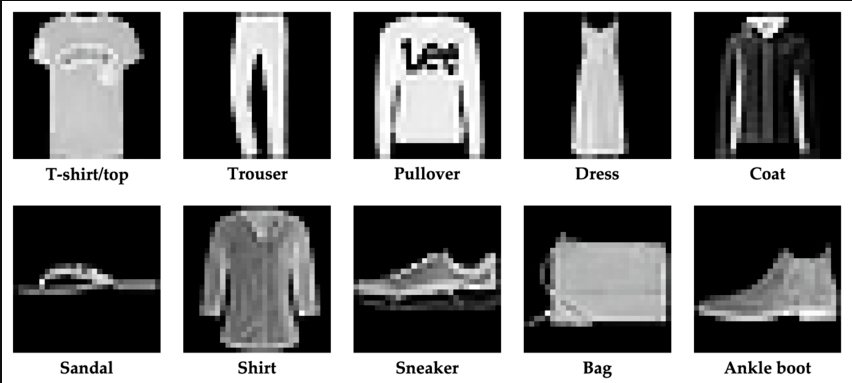

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

**what we are doing with it ?**

**we are training our model to understand the training dataset,and we want from our model that when we provide it test images he has to predict correct label**

In [ ]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
len(train_dataset)

60000

In [ ]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
len(test_dataset)

10000

**1.3 converting data into batches**

We'll also create a DataLoader, which can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.

We can use the data loader in a for loop. Let's look at an example

In each iteration, the data loader returns one batch of data with the given batch size. If shuffle is set to True, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

In [ ]:
batch_size=64

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
len(list(train_loader))

938

In [ ]:
len(list(test_loader))

157

# **2. Build Logistic Regression Model**

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self,in_dim,n_class):
    super().__init__()
    self.linear=nn.Linear(in_dim,n_class)

  def forward(self,x):
    out=self.linear(x)
    return out

# **Class:**

First, we create our LinearRegression class using Python's object-oriented programming. In a class, we define a set of rules that only objects can access. The code inside the class will not execute until you create an instance of it. Within the class, a function is referred to as a method.

# **LinearRegression:**

It is just a class name; you can choose any name you like.

# **(nn.Module):**<br>
nn.Module is the parent class from which we are inheriting. As you know, we are using nn.Linear(1,1), which creates a linear layer with one input and one output, and it initializes weights and biases among other things. But how does nn.Linear accomplish this in our class, since we aren't hardcoding anything? We're simply passing (1,1) to nn.Linear, and it constructs the neural network for us. Is this done by magic? Not really. It's all thanks to nn.Module, which we are inheriting. In PyTorch, the developers have already written classes for everything; we just have to inherit from them and use the specific methods and functions they provide, such as nn.Linear, nn.Sequential, or nn.Dropout. All these are contained within nn.Module, which we are inheriting.<br>

Then, we inherit the base class (nn.Module) from PyTorch.<br>

**Subclass nn.Module:** This contains all the building blocks for neural networks. It is the basic foundation for creating a PyTorch model by subclassing nn.Module.<br>

**Utility Functions:** nn.Module includes different classes that help you build neural network models. All models in PyTorch inherit from the subclass nn.Module, which has useful methods like parameters(), train(), and others. The torch.nn module also includes various layers that you can use to construct your neural network.

# **def __init__()**<br>

Here, we are initializing our constructor. A constructor is a special method that is automatically executed when an object is created. There's no need to call it manually like the forward method or other methods.

Essentially, when you create an object of the class, the constructor is executed automatically. This constructor sets up the neural network by initializing the weights and biases. However, for this neural network to operate, we must call the forward method by passing data, which typically occurs in the training and testing loops.

# **self**<br>

self refers to the current object, but why is it necessary?

In a class, methods can't be accessed directly; they can only be accessed through objects. So, what if one method inside a class needs to communicate with another method? Since everything inside a class is accessible only through objects, we need a way for methods to refer to the current object. That's where self comes in.

In every method, we include self as an argument. When we want to receive the object inside a method, we define a positional variable (or argument) and name it self. However, self is not mandatory; you can give it any name you prefer. The important thing is that it represents the current object within the class.

# **super().__init__()**<br>

Our class (the child class) has a constructor, and nn.Module (the parent class) has its own constructor. If only the child class's constructor is called, the parent class's constructor will not be initialized automatically. However, we need the parent class’s constructor to properly initialize everything that nn.Module handles.

To initialize the nn.Module class constructor, we use super().__init__(). This ensures that the constructor of the parent class (nn.Module) is also called when our class's constructor is executed. By using super().__init__(), we initialize all components that are defined within the parent class's constructor.

This is commonly used to call the constructor of the base class (nn.Module), allowing our class to inherit all its properties and methods properly.

# **nn.Linear(1,1)**<br>

Instead of initializing the weights and biases manually, we can define the model using the nn.Linear class from PyTorch, which handles this automatically. Here, we are initializing our weights and biases for the neural network. The parameters (1,1) represent the number of input features and the number of output targets, respectively.

In this case, in_features is the number of dimensions your input data has, and out_features is the number of dimensions you'd like for the output. In our class, both of these values are 1.

# **def forward(self, x):**<br>

In our parent class, there is also a forward method. However, we need to override that method by creating our own forward method in the child class. This overrides the parent class’s forward method, meaning the parent's method won't be executed; instead, the child class's method will take precedence. This is a core concept of inheritance in object-oriented programming.

If both the parent (nn.Module) and the child class (our class) have a method with the same name, then the method defined in the child class will be executed.

**how it works?**<br>
It is essential to override the forward method because it defines the specific computation that occurs when the model processes input data. This method is necessary for all subclasses of nn.Module, as it outlines the computation performed on the data passed to the model (e.g., the linear regression formula).
<br>

The forward method instructs the neural network on how to perform calculations on the input (which are tensors full of data) within nn.Module blocks.


The forward method is invoked when we use the neural network to make a prediction, also known as running the forward pass. In this process, information flows from the input through any hidden layers to the output.


In practice, the forward method is executed through the __call__ function of nn.Module. This means when you run model(input), it internally calls the forward method to process the input.

By defining the forward method, we specify how the input data is transformed and passed through the network, ensuring that our model behaves as intended.

# **out = self.linear(x)**<br>
In the line **out = self.linear(x)**, we are passing the data x to self.linear, which computes the linear regression operation wx+b. The result of this computation is stored in the variable out. This process is akin to feeding the input data x into the linear regression model, where it undergoes the computation wx+b, and the resulting output is assigned to out.

# **return out**
In the line **return out** within the forward method of our LinearRegression class, the output out is returned. This output is the result of the linear regression computation  wx+b performed earlier in the method. We will receive this output after initializing the model and providing input data during the training loop, specifically during the forward pass. This step ensures that the processed data, after being computed by the model, is forwarded for further use, such as calculating loss or making predictions.

In [ ]:
model=LogisticRegression(28 * 28 , 10)

When we execute model = LinearRegression(), we're creating an object or instance of our LinearRegression class. This object has access to all the properties and methods defined within the class.

To clarify, when we create a variable like model, we're essentially creating a reference variable. This variable doesn't contain the object itself; instead, it holds the memory address of the object. So, model is not the object itself; rather, it's a reference to the object.

When we call LinearRegression(), a new object is created, and the reference to that object is stored in the variable model. This allows us to access and manipulate the object's properties and methods using the model variable. In summary, model is a reference variable that points to the object created by the LinearRegression() call.

In [ ]:
model

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
model=model.to(device)

# **3 . Pick a loss Function**

In [ ]:
learning_rate=1e-3

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

# **loss Function**<br>
defining **loss function** which will be used for calculating loss during training<br>
measures how wrong  your models prediction (predicted ,actual),lower thebetter <br>
pytorch has plenty of built-in loss functions in torch.nn

# **Optimizer:**
The optimizer plays a crucial role in guiding the model's learning process by updating its internal parameters to minimize the loss function. In essence, it determines how the model's parameters stored in nn.Parameter should be adjusted to improve gradient descent and consequently reduce the loss.

In PyTorch, you can access various optimization algorithms through the torch.optim module. These optimization methods provide implementations of popular algorithms such as Stochastic Gradient Descent (SGD), Adam, and RMSprop, among others. By selecting an appropriate optimizer and tuning its hyperparameters, you can effectively train your model to better represent the input data and improve its performance on the task at hand.

# **Model Parameters:**
PyTorch models provide a convenient .parameters() method, which returns a list containing all the weight matrices and bias vectors present in the model. For our linear regression model, this list would typically consist of one weight matrix and one bias vector.

By accessing model.parameters(), you obtain a handle to the model's parameters that you'd like to optimize during training. These parameters include the weights and biases, which are initially randomly set before training begins. Optimizing these parameters involves adjusting them iteratively to minimize the loss function, ultimately improving the model's performance on the given task.

# **Learning Rate (lr):**
The learning rate is a critical hyperparameter that determines the size of the updates made to the model parameters during optimization. It influences the convergence speed and stability of the training process.

A higher learning rate means the optimizer will attempt larger updates to the parameters, which can speed up convergence. However, setting the learning rate too high may cause the optimizer to overshoot the optimal values or even fail to converge.

Conversely, a lower learning rate results in smaller parameter updates, which can lead to more stable optimization. However, excessively small learning rates may cause the optimization process to progress too slowly.

Common starting values for the learning rate include 0.01, 0.001, and 0.0001, but these values can be adjusted based on the specific problem and model characteristics. Additionally, learning rate scheduling techniques can be employed to dynamically adjust the learning rate during training, further optimizing the convergence process over time.

**Note**  that model.parameters() is passed as an argument to optim .SGD so that the optimizer knows which matrices should be modified during the update step.also ,we can specify a learning rate that controls the amount by which the parameters are modified

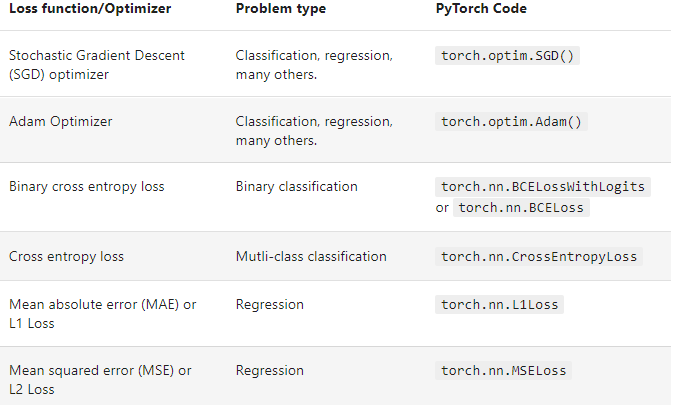

# **4 .Building a Training Loop**

In [ ]:
num_epochs=10

In [ ]:
for epoch in range(num_epochs): #initializing our for loop ,
    print('*' * 10)
    print(f'epoch {epoch+1}')
    since = time.time()
    running_loss = 0.0
    running_acc = 0.0
    model.train()   #used before training the model
    for i, data in enumerate(train_loader, 1): #getting index numbers with data
        img, label = data #getting img and labels from our data
        img = img.view(img.size(0), -1)
        img=img.to(device)
        label=label.to(device)

        out = model(img)  #getting our prediction from model
        loss = criterion(out, label)  # getting loss
        running_loss += loss.item()
        _, pred = torch.max(out, 1)
        running_acc += (pred==label).float().mean()

        optimizer.zero_grad() # making our gradients zero (it is necessary )
        loss.backward()  #doing backpropagation
        optimizer.step() #applying optimizer on it

        if i % 300 == 0: #for printing losses ,print out what is happing every 300 indexing
            print(f'[{epoch+1}/{num_epochs}] Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')
    print(f'Finish {epoch+1} epoch, Loss: {running_loss/i:.6f}, Acc: {running_acc/i:.6f}')

**********
epoch 1
[1/10] Loss: 1.995989, Acc: 0.394219
[1/10] Loss: 1.815609, Acc: 0.506068
[1/10] Loss: 1.687700, Acc: 0.553854
Finish 1 epoch, Loss: 1.673700, Acc: 0.557969
**********
epoch 2
[2/10] Loss: 1.285315, Acc: 0.664427
[2/10] Loss: 1.235253, Acc: 0.671354
[2/10] Loss: 1.195287, Acc: 0.674340
Finish 2 epoch, Loss: 1.190879, Acc: 0.674574
**********
epoch 3
[3/10] Loss: 1.055840, Acc: 0.692656
[3/10] Loss: 1.037734, Acc: 0.692630
[3/10] Loss: 1.021353, Acc: 0.695990
Finish 3 epoch, Loss: 1.018986, Acc: 0.696862
**********
epoch 4
[4/10] Loss: 0.958595, Acc: 0.705833
[4/10] Loss: 0.943549, Acc: 0.711120
[4/10] Loss: 0.929742, Acc: 0.716094
Finish 4 epoch, Loss: 0.927931, Acc: 0.716368
**********
epoch 5
[5/10] Loss: 0.888125, Acc: 0.726823
[5/10] Loss: 0.878742, Acc: 0.730495
[5/10] Loss: 0.869854, Acc: 0.732726
Finish 5 epoch, Loss: 0.869275, Acc: 0.732576
**********
epoch 6
[6/10] Loss: 0.839685, Acc: 0.741875
[6/10] Loss: 0.832630, Acc: 0.743932
[6/10] Loss: 0.827321, Acc:

# **for epoch in range(num_epochs):**
For each epoch in the range of num_epochs, we pass the data through the model. An epoch refers to one complete pass of the entire dataset through the model. In this loop, we repeat this process for a specified number of epochs, for example, 100 epochs would mean the data passes through the model 100 times. Each iteration within this loop is called an epoch.

# **model.train()**
The command model.train() puts the model into training mode. This is particularly important for models that have different behaviors during training versus testing phases, such as Dropout or BatchNorm layers. In training mode, these layers behave as expected during the learning process, which involves activating their specific functionalities like dropout regularization.

# **out = model(input)**
The line **out = model(input)** initiates a forward pass, where the input data is passed through the model. This triggers the execution of the forward() method defined within the model object. During this process, the model computes its forward calculations based on the input data. This operation allows the model to process all of the training data once, performing the necessary computations defined by its forward() method.

# **loss = criterion()**
The line **loss = criterion()** calculates the loss value, which indicates how inaccurate the model's predictions are compared to the ground truth. To evaluate the model's performance, we compare its predictions with the actual targets.

This comparison involves several steps:<br>

The model's predictions are compared to the ground truth, resulting in a difference matrix.<br>
Each element in the difference matrix is squared to remove negative values.
The average of all the squared elements in the resulting matrix is calculated.
The resulting value is a single number known as the mean squared error (MSE). It serves as a measure of how well the model is performing, with lower MSE values indicating better performance. This metric provides a baseline for assessing the model's accuracy and guides further improvements to the model.

# **optimizer.zero_grad()**
The line **optimizer.zero_grad()** resets the gradients of all optimized parameters to zero. This step is crucial because gradients in PyTorch accumulate by default across iterations. Without resetting the gradients, the new gradient values computed during backpropagation would be added to the existing gradients from previous iterations, which could lead to incorrect model updates and erratic behavior.

To ensure that each training step starts with a clean slate, we explicitly zero the gradients at the beginning of the loop. This allows the optimizer to correctly compute updates for the current training step only. By resetting the gradients, we avoid the risk of accumulating error over time, which helps stabilize the training process.

# **loss.backward()**
The method **loss.backward()** initiates backpropagation, computing the gradients of the loss with respect to all model parameters that have requires_grad=True. This process is crucial for updating the parameters during training.

In PyTorch, the gradients of the loss with respect to the parameters are automatically computed due to the requires_grad attribute being set to True on those parameters. These gradients are stored in the .grad property of each tensor.

The act of calling loss.backward() triggers the backward pass, where the gradient information flows backward through the network—from the output back to the inputs. This reverse flow allows PyTorch to calculate the partial derivatives of the loss with respect to each parameter, effectively enabling the optimizer to adjust the parameters in a way that minimizes the loss. This step is vital for learning optimal parameters that improve model performance over time.

# **optimizer.step()**
The **optimizer.step()** method updates the parameters of the model with respect to the gradients calculated by loss.backward().

During training, the optimizer, typically an instance of gradient descent optimization algorithm like stochastic gradient descent (SGD), adjusts the parameters with requires_grad=True based on the gradients of the loss function. This adjustment aims to improve the parameters iteratively towards minimizing the loss.

Instead of manually manipulating the model's weights and biases using gradients, we utilize the optimizer—such as optim.SGD—to perform these updates automatically. The term "stochastic" in SGD signifies that the samples are selected in random batches rather than as a single group. This random selection aids in converging to an optimal solution efficiently.

By calling optimizer.step(), we execute the parameter update process defined by the optimization algorithm, effectively adjusting the parameters to minimize the loss and improve the model's performance. This automated update process simplifies training and ensures that the model learns effectively from the training data.








# **But why did the loss go down ?**
The reduction in loss is primarily due to the updates made to the model's internal parameters (weights and biases) which better align with the underlying patterns in the data.

**But how exactly does the loss decrease?**<br>

As we know, we need to adjust the weights and biases to minimize the loss. The loss function is essentially a quadratic function of these parameters, and our goal is to find the configuration of weights and biases where the loss is at its minimum. If we were to graph the loss with respect to any individual weight or bias, it would typically appear as a parabola.<br>

An essential insight from calculus is that the gradient of a function at a point indicates the rate of change, or slope, of that function at that point with respect to the weights and biases. Here’s what this means in our context:<br>



# **If a gradient element is positive:**<br>
Increasing the weight slightly will increase the loss.<br>
Decreasing the weight slightly will decrease the loss.<br>


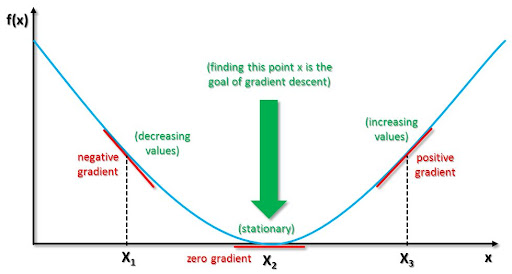

# **If a gradient element is negative**:<br>
Increasing the weight slightly will decrease the loss.<br>
Decreasing the weight slightly will increase the loss.<br>


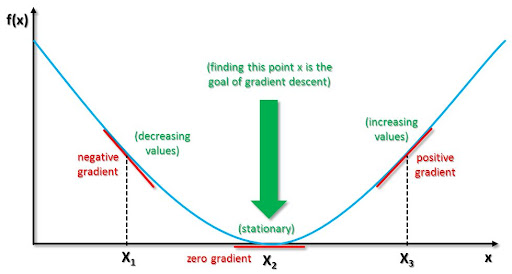

The effect of changing a weight on the loss is directly proportional to the gradient of the loss with respect to that weight. This observation is the cornerstone of the gradient descent optimization algorithm, which we use to enhance our model by navigating down the gradient.<br>

To achieve this, we adjust each weight by subtracting a small quantity proportional to the derivative of the loss with respect to that weight. This step size is multiplied by a small number, often referred to as the learning rate (e.g., 0.0001), to ensure that we do not alter the weights too drastically. This careful adjustment allows us to take small steps in the direction that reduces the loss, rather than making overly large adjustments. This number, the learning rate, is crucial as it determines the size of the steps we take on this gradient descent journey, balancing between speed and accuracy of convergence.

the only change is that we we'll work batches of data instead of processinh in the entire training data in every iteration

In each iteration, the data loader returns one batch of data with the given batch size. If shuffle is set to True, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

we use the data loader defined earlier to get batches of data for every iteration.

all the predictions should be made with objects on the same device (e.g data and model on GPU only orr data and model on cpu only
)

**Accuracy**	Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct.

# **5.Evaluate Your Model**

In [ ]:
    model.eval()  #for checking how good is your model on the test dataset  (for evaluation )
    eval_loss = 0.
    eval_acc = 0.
    for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        img=img.to(device)
        label=label.to(device)
        with torch.no_grad(): # because here we do not need gradients because we are just testing our model,
            out = model(img)
            loss = criterion(out, label)
        eval_loss += loss.item()
        _, pred = torch.max(out, 1) #getting prediction from our model for testing the result
        eval_acc += (pred == label).float().mean()
    print(f'Test Loss: {eval_loss/len(test_loader):.6f}, Acc: {eval_acc/len(test_loader):.6f}')
    print(f'Time:{(time.time()-since):.1f} s')

Test Loss: 0.737699, Acc: 0.761644
Time:1639.9 s


# **model.eval()**
**model.eval()** is a PyTorch method that switches the model to evaluation mode. It's crucial for ensuring consistent behavior during testing by deactivating features like dropout and batch normalization, which are only needed during training. This function ensures stable and reliable model outputs for testing on new data, promoting better generalization beyond the training set.

# **torch.no_grad()**
We use `**torch.no_grad()**` to indicate to PyTorch that we do not need to track, calculate, or modify gradients when making predictions or evaluating the model. This context manager is useful because it temporarily sets all the `requires_grad` flags to false. This can be particularly beneficial for memory savings and computational efficiency, as it prevents the creation of the computational graph during operations like forward passes through the network, which are unnecessary when you're not planning to perform backpropagation. This is especially important during model evaluation and when making predictions on new data.

Notice the testing loop doesn't contain performing backpropagation (loss.backward()) or stepping the optimizer (optimizer.step()), this is because no parameters in the model are being changed during testing, they've already been calculated. For testing, we're only interested in the output of the forward pass through the model.

# **5.1 visulize how model is doing**

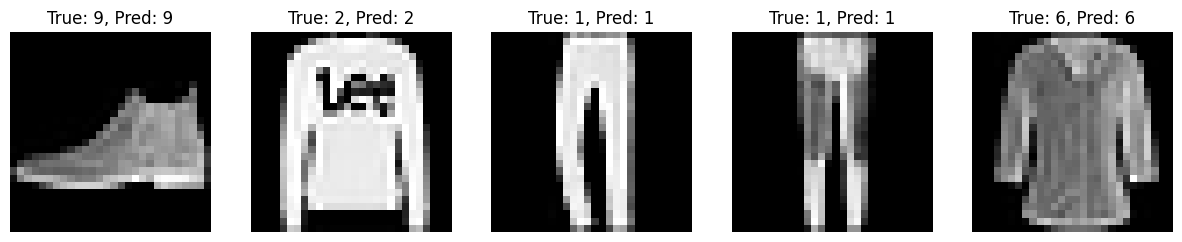

In [ ]:
# Visualizing some predictions
images, labels = next(iter(test_loader))
images = images.reshape(-1, 28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
#fig is a reference to the entire figure.
#ax is an array of Axes objects, and each Axes object can be used to draw a plot. Since there are 5 subplots, ax contains 5 such objects.
#figsize=(15, 3) sets the size of the entire figure to 15 inches wide and 3 inches tall.
fig, ax = plt.subplots(1, 5, figsize=(15, 3)) #The arguments (1, 5) specify that the figure should have 1 row of 5 columns, i.e., 5 subplots aligned horizontally.
for i in range(5):
    ax[i].imshow(images[i].reshape(28, 28).cpu(), cmap='gray')
    ax[i].set_title(f'True: {labels[i].item()}, Pred: {predicted[i].item()}')
    ax[i].axis('off')
plt.show()



# **6. How To improve this model**

**Improving a model (from a model perspective)**

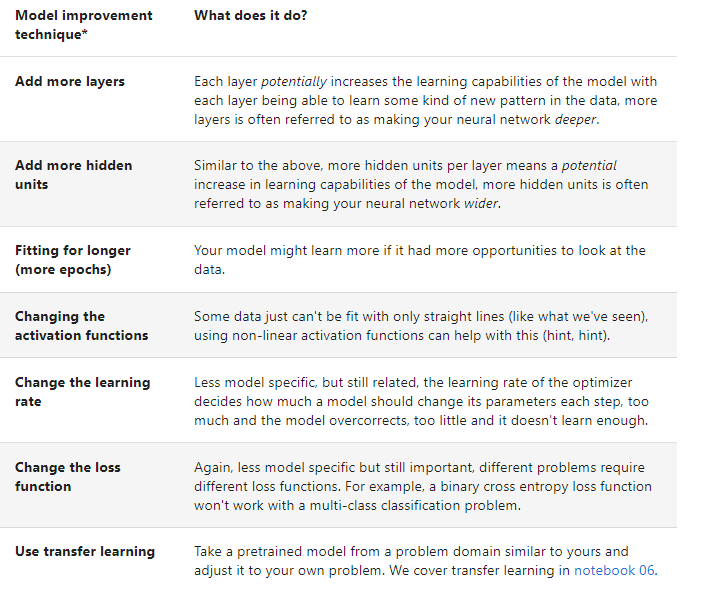

*because you can adjust all of these by hand, they're referred to as hyperparameters.

# **7.Save The Model**

**it is recomended to save state_dict()**

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0339,  0.0316,  0.0134,  ..., -0.0391,  0.0202,  0.0061],
                      [ 0.0166,  0.0063, -0.0005,  ...,  0.0128, -0.0092, -0.0266],
                      [-0.0200, -0.0061, -0.0205,  ...,  0.0231,  0.0081, -0.0139],
                      ...,
                      [-0.0106, -0.0320, -0.0258,  ..., -0.0252,  0.0164,  0.0220],
                      [-0.0037,  0.0183, -0.0109,  ..., -0.0383,  0.0206, -0.0208],
                      [ 0.0100,  0.0237,  0.0309,  ..., -0.0090, -0.0288, -0.0163]])),
             ('linear.bias',
              tensor([-0.0178,  0.0255, -0.0518, -0.0323, -0.1170,  0.3126,  0.0127, -0.0101,
                      -0.0899, -0.0883]))])

To save the model, it's recommended to use the **state_dict()** method, which returns a dictionary containing learned parameters like weights and biases. This dictionary represents the model's state but not the entire model architecture.

In [ ]:
torch.save(model.state_dict(),'./LogisticRegression.pth')

Here's what each part of the torch.save() function does:

1. Specify what you want to save using model.state_dict(), which captures the learned parameters.
2. Indicate where you want to save the state dictionary by providing a file path, such as ./linearRegression.pth. This file will store the model's learned parameters for future use.